<a href="https://colab.research.google.com/github/LBryant01/Homework5/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

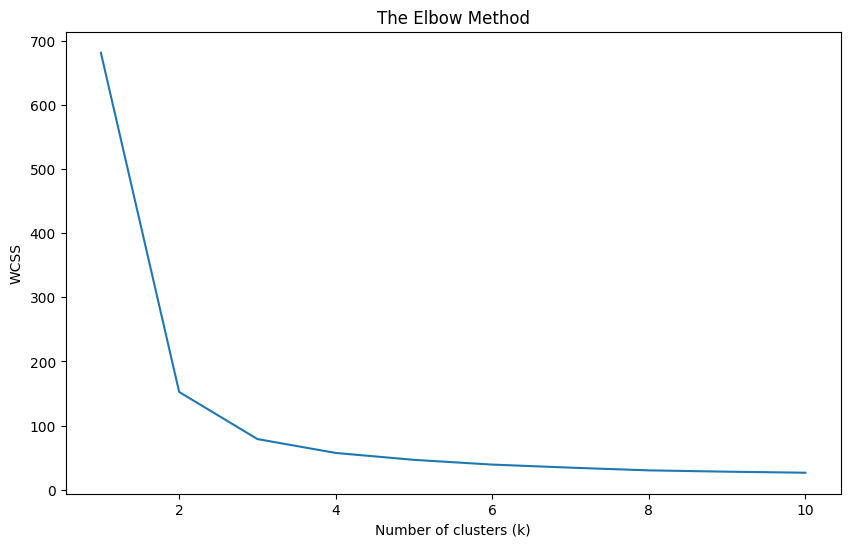

In [ ]:
#London Bryant
#CS4410
#Homework 5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features

# List to hold the WCSS values
wcss = []
# Calculate WCSS for different values of k
for k in range(1, 11):  # Testing k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=11)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Print the optimal number of clusters
print(f"The optimal number of clusters is 2")

The optimal number of clusters is 2


In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Fetch the dataset (X contains the data, y contains the labels)
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Apply StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
# Logistic Regression without PCA
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
start_time_no_pca = time.time()
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=1000)
logisticRegr.fit(X_train_scaled, y_train)
y_pred_no_pca = logisticRegr.predict(X_test_scaled)
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)
end_time_no_pca = time.time()
time_no_pca = end_time_no_pca - start_time_no_pca
print(f"Accuracy without PCA: {accuracy_no_pca}")
print(f"Time taken without PCA: {time_no_pca} seconds")


Accuracy without PCA: 0.9126190476190477
Time taken without PCA: 108.7045567035675 seconds


In [ ]:
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print("PCA transformation complete.")



PCA transformation complete.


In [ ]:
# Logistic Regression with PCA
start_time_pca = time.time()
logisticRegr.fit(X_train_pca, y_train)
y_pred_pca = logisticRegr.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
end_time_pca = time.time()
time_pca = end_time_pca - start_time_pca
print(f"Accuracy with PCA: {accuracy_pca}")
print(f"Time taken with PCA: {time_pca} seconds")


Accuracy with PCA: 0.10128571428571428
Time taken with PCA: 59.430946350097656 seconds
